In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplleaflet as mpll
import geopandas as gpd
import matplotlib.image as mpimg
import scipy.ndimage as nd
from scipy import misc

### Load two CSVs:
(1) selected complaint type (gas plumbing) for 2018
(2) all 311 complaints for 2018

In [226]:
#pl311 = pd.read_csv('data/311_three_months_plumbing.csv')
#all311 = pd.read_csv('data/311_three_months_all.csv')

pl311 = pd.read_csv('data/311_plumbing.csv',usecols=['Longitude','Latitude'])
all311 = pd.read_csv('data/311_all2018.csv',usecols=['Longitude','Latitude'])


In [51]:
# Drop all columns except lat lon and date
#pl311=pl311[['Created Date','Latitude','Longitude']]
#all311=all311[['Created Date','Latitude','Longitude']]

# Take 1 / 100 rows, leaving 1,700 points
all311 = all311[::100]

# Drop NANs
all311.dropna(inplace=True)
all311.dropna(inplace=True)

print("Shape of plumbing file {} \n Shape of all311 file {}".format(pl311.shape, all311.shape))

Shape of plumbing file (6379, 2) 
 Shape of all311 file (2469181, 2)


In [63]:
all311.head()

,Created Date,Latitude,Longitude
0,03/24/2017 01:47:28 PM,40.679507,-73.944020
100,01/31/2017 01:41:00 PM,40.714522,-73.965049
200,02/04/2017 08:54:00 AM,40.675984,-73.904377
300,02/15/2017 12:08:00 PM,40.595255,-73.973477
400,01/02/2017 09:11:00 PM,40.671992,-73.940259


### Plot their lat lons

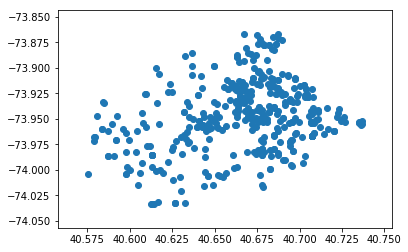

In [67]:
plt.scatter(pl311.Latitude,pl311.Longitude)

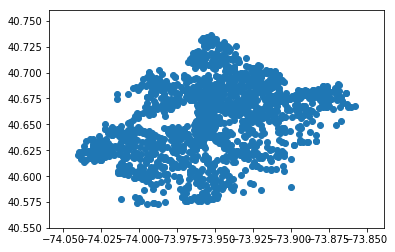

In [68]:
plt.scatter(all311.Longitude,all311.Latitude)

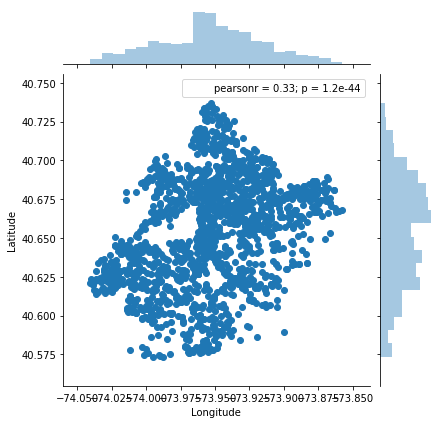

In [69]:
sns.jointplot(x='Longitude', y='Latitude', data=all311);

### Show on a leaflet map

In [70]:
f, ax = plt.subplots(1, figsize=(6, 6))

pl311.plot(kind='scatter', x='Longitude', y='Latitude', \
                      s=30, linewidth=0, ax=ax);

mpll.display(fig=f,)

In [73]:
f, ax = plt.subplots(1, figsize=(6, 6))

all311.plot(kind='scatter', x='Longitude', y='Latitude', \
                      s=30, linewidth=0, ax=ax);

mpll.display(fig=f,)

### Plot a kernel density estimation of the points
This is a continuous probability distribution based on the x,y event data
Key parameters: n_levels and bw (bandwidth)
    
--> save as rasters

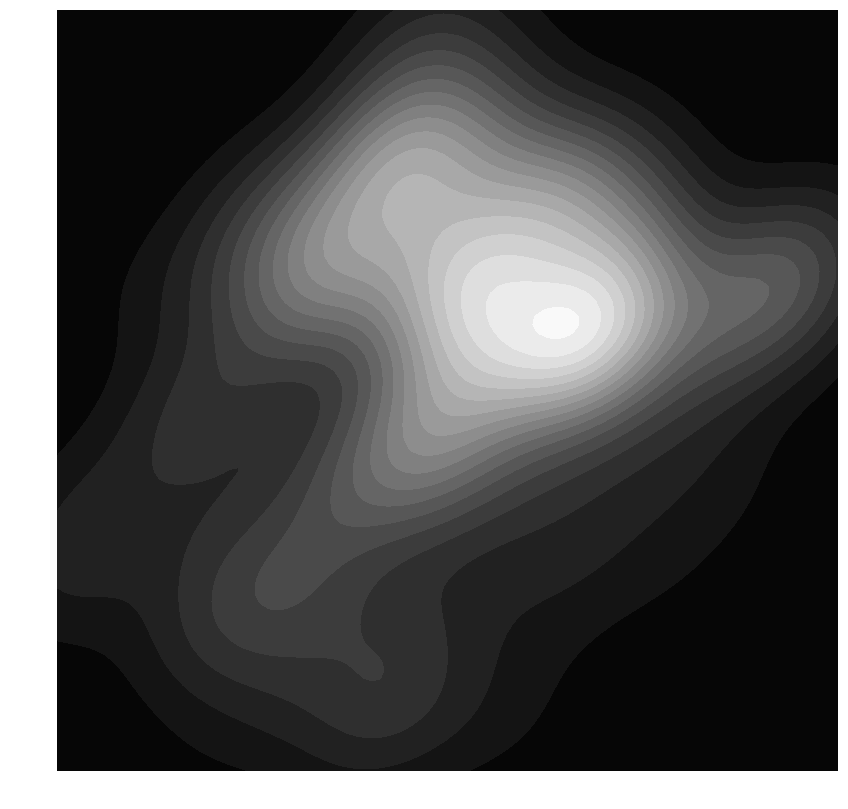

In [135]:
f, ax = plt.subplots(1, figsize=(14, 14))
sns.kdeplot(pl311['Longitude'], pl311['Latitude'], shade=True, cmap='gray',n_levels=20,bw=0.001,ax=ax,)
plt.axis('off')
f.savefig('pl311_raster.png')

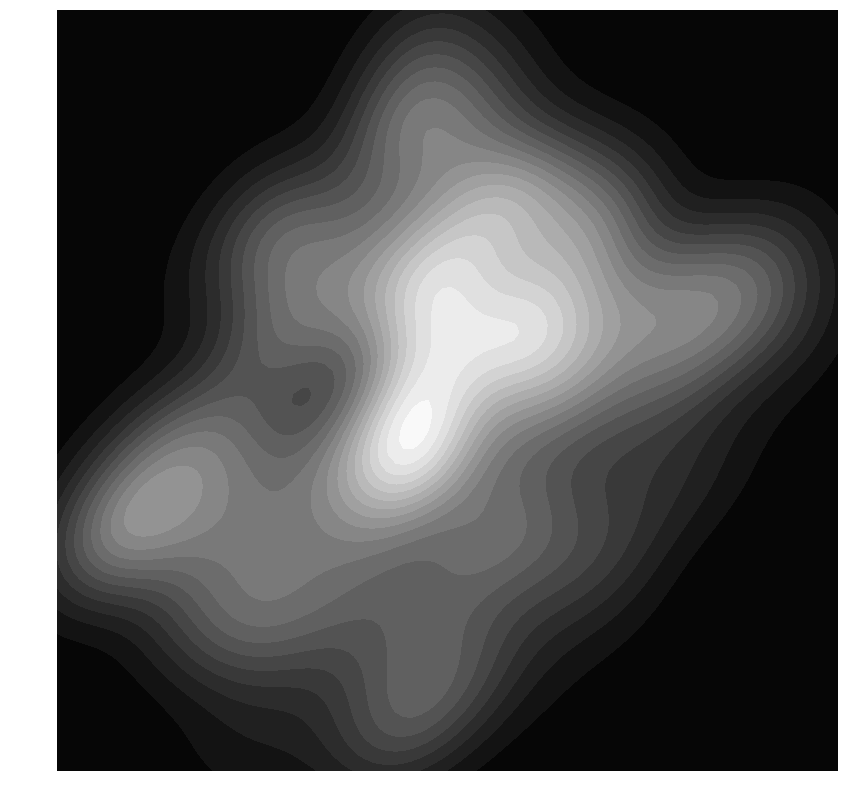

In [136]:
f, ax = plt.subplots(1, figsize=(14, 14))
sns.kdeplot(all311['Longitude'], all311['Latitude'], shade=True, cmap='gray',n_levels=20,bw=0.001,ax=ax);
plt.axis('off')
f.savefig('all311_raster.png')

In [222]:
#from IPython.display import Image
#Image(filename='pl311_raster.png')

### Load the rasters as NP arrays

In [228]:
nd.imread('pl311_raster.png')

/nfshome/nj935/.conda/envs/remote_sensing/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [229]:

pl311_rast = misc.imread('pl311_raster.png')
all311_rast = misc.imread('all311_raster.png')


/nfshome/nj935/.conda/envs/remote_sensing/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/nfshome/nj935/.conda/envs/remote_sensing/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [230]:
print("Mean value: ",all311_rast.mean())
print("Shape: ",all311_rast.shape)
print("Dtype: ",all311_rast.dtype)

('Mean value: ', 160.52119182453075)
('Shape: ', (1008, 1008, 4))
('Dtype: ', dtype('uint8'))


(-0.5, 1007.5, 1007.5, -0.5)

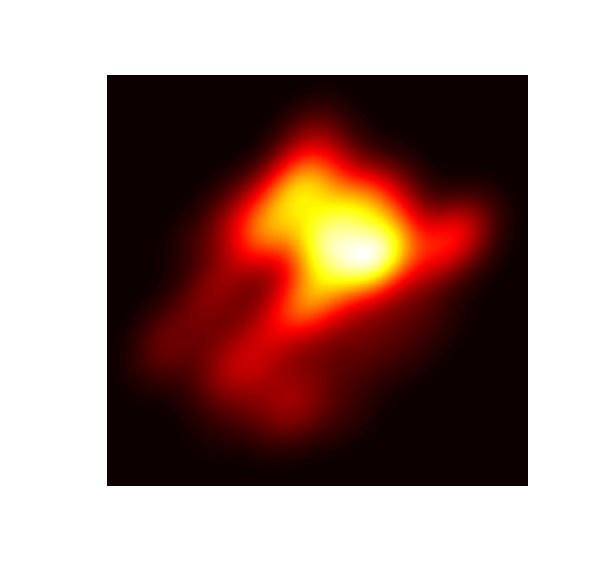

In [231]:
f = plt.figure(figsize=[10,10])
plt.imshow(pl311_rast);
plt.axis('off')

(-0.5, 1007.5, 1007.5, -0.5)

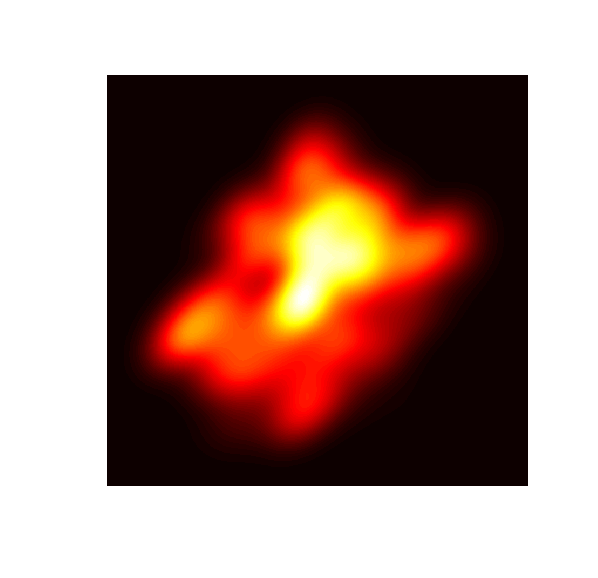

In [232]:
f = plt.figure(figsize=[10,10])
plt.imshow(all311_rast);
plt.axis('off')

### Calculations based on the two rasters
* Normalize KDE of plumbing complaints against KDE of all complaints
* Visualize the resulting difference in complaint volumes
* --> this would ideally be overlaid on a map

(-0.5, 1007.5, 1007.5, -0.5)

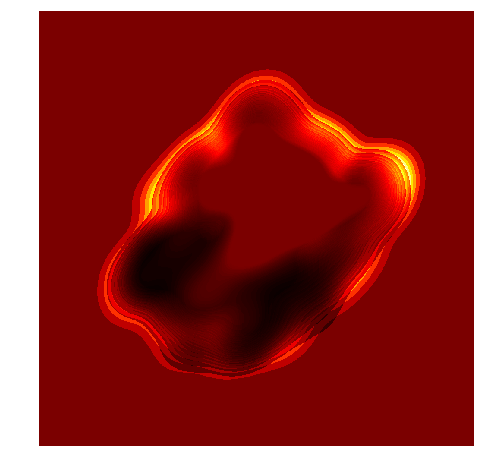

In [234]:
diff = pl311_rast / (all311_rast + 0.001)  # This normalization equation made more sense to me
                                 # Can also do pl311 / (all311 + pl311 + 0.001), is that better?
f = plt.figure(figsize=[8,8])
plt.imshow(diff[:,:,0],cmap='hot');
plt.axis('off')